# Логистическая регрессия для многоклассовой классификации

Будем решать задачу многоклассовой классификации на классическом датасете iris, в котором классы линейно разделимы -  значит логистическая регрессия даст хороший результат.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import ipdb

Загружаем датасет

In [2]:
iris = datasets.load_iris()

Подробнее изучить информацию о датасете можно либо загуглив,либо, к примеру так.

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**1. Готовим данные для обучения. (1 балл)**   
Создайте матрицу признаков Х, которая убдет содержать состоит из (3) - petal length in cm и (4) - petal width in cm.  
Определите вектор классов у.  

In [37]:
# YOUR CODE HERE
x = iris.data[:,2:]
y = iris.target

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**2. Визуализация данных (2 балла)**  
C помощью matplotlib и scatter plot визуализируйте датасет. Результат должен быть как на картинке. Цвета точек можно задать параметром c=y.
- Правильно построенные график - 1 балл.
- Подписанные оси - 1 балл.
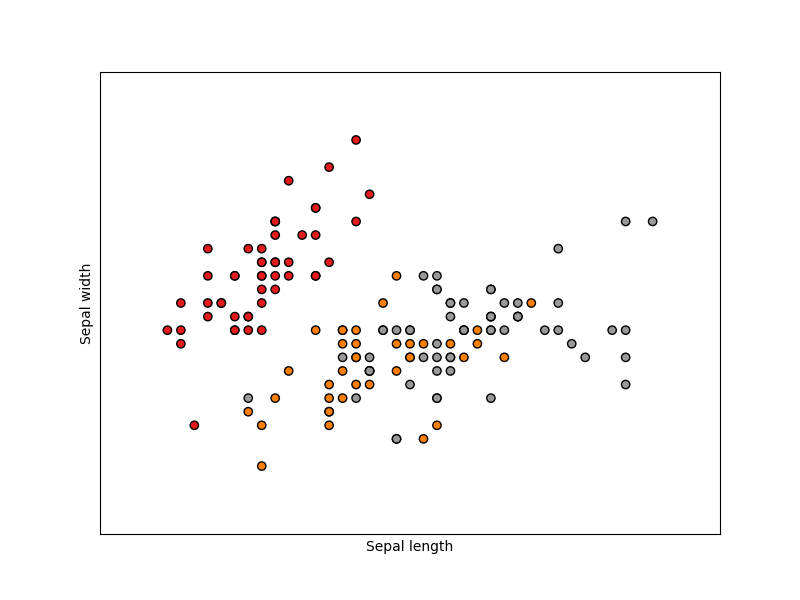


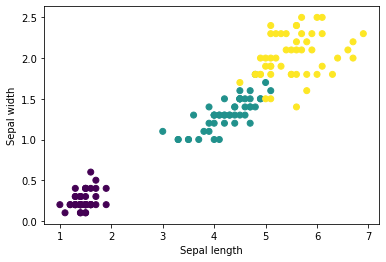

In [28]:
# YOUR CODE HERE
plt.scatter(x[:, 0], x[:,1], c=y, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


Вспомним, что фукнция sigmoid имеет вид:
$$g(z) = {1 \over 1 + e^{-z}}$$


Функция гипотезы имеет вид:
$$h_ \theta(x) = g(\theta^T x)$$


In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

В качестве функции потерь мы в бинарной классификации используем бинарную кросс  (перекрёстнную) энтропию, которую считаем по формуле:
$$J(\theta) = {1 \over m} \sum\limits_ {i=1}^{m} [-y^{(i)} \log h_ \theta (x^{(i)}) - (1 - y^{(i)}) \log (1-h_ \theta (x^{(i)}))]$$

Кстати, чтобы понять, почему "перекрёстная",мы можем просто визуализировать её. Целевая переменная может принимать значения 1 или 0.

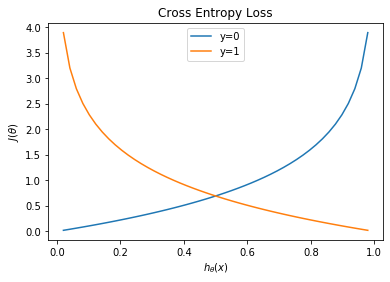

In [30]:
h = np.linspace(0, 1)[1:-1]
for y in [0, 1]:
    plt.plot(h, -y * np.log(h) - (1 - y) * np.log(1 - h), label=f"y={y}")
plt.title("Cross Entropy Loss") 
plt.xlabel('$h_ {\\theta}(x)$'); plt.ylabel('$J(\\theta)$')
plt.legend();

Мы можем видеть, что правильный прогноз класса будет значение функции потерь 0. При этом значение функции потерь стремится к бесконечности, когда прогноз ближе к неправильному классу.

Градиент бинарной бинарной кросс энтропии имеет вид:  
$${\partial J(\theta)\over \partial\theta} = {1 \over m} \sum\limits_ {i=1}^{m} (h_ \theta (x^{(i)})-y^{(i)})x^{(i)}$$

**3. Напишите функцию, которая возвращает значение функции ошибки ошибки и её градиента
 (3 балла)**

In [31]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    # YOUR CODE HERE
#     ipdb.set_trace()
    cost = (1/m)* np.sum((-y * np.log(h)) - (np.ones_like(h) - y) @ np.log(np.ones_like(h) - h))
    # YOUR CODE HERE
    grad = (1/m) * np.sum((h - y) @ x)
    return cost, grad

**4. Напишите функцию fit(...) которая будет выполнять классификацию по стратегии [one-vs.-rest](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest) (cost function)(1 балл)**  

Обновление параметров необходимо делать согласно градиентному спуску.

In [32]:
def fit(x, y, max_iter=5000, alpha=0.1):
    # a way to add a column of ones
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)
    step = round(max_iter / 10)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        theta = np.zeros(x.shape[1])
        class_cost = []

        for epoch in range(max_iter):
            # save costs, compute updated grad and theta 

            theta = theta - (alpha/len(y)) * (x.T @ (sigmoid(x @ theta) - binary_y))

#             ipdb.set_trace()
        
            error, grad = cost(theta, x, binary_y)
            costs[epoch] = error
            
            if(epoch % step == 0):
                print('Step {} ERROR: {}'.format(epoch / step, error))
                class_cost.append(error)
            # YOUR CODE HERE
            pass
        print('Class "{}" error: {}'.format(c, error) )
        plt.plot(class_cost)
        plt.show()
        thetas.append(theta)


    return thetas, classes, costs

**5. Напишите функцию predict(...), которая будет давать предсказания классов (дискретные значения) (3 балла).**

In [33]:
def predict(thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    # YOUR CODE HERE
    preds = []
    classes = len(thetas)
    
    for t in thetas:
        class_pred =  sigmoid(x @ t.T)
        preds.append(class_pred)

    matrix = np.matrix(np.array(preds).round()).argmax(0)
    #  make ndarray great again!
    return np.array(matrix).reshape((len(x), ))


Запускаем тренировку и строим график функции потерь.

Step 0.0 ERROR: 69.50650491241784
Step 1.0 ERROR: 3.7889211331008847
Step 2.0 ERROR: 2.22403131170148
Step 3.0 ERROR: 1.5982322685033388
Step 4.0 ERROR: 1.2585493779678973
Step 5.0 ERROR: 1.0438166869061243
Step 6.0 ERROR: 0.895084033684607
Step 7.0 ERROR: 0.7855929123574109
Step 8.0 ERROR: 0.7014018149128243
Step 9.0 ERROR: 0.6345137486947868
Class "0" error: 0.5800035485692249


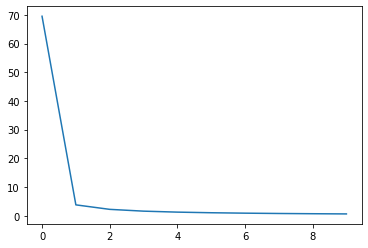

Step 0.0 ERROR: 69.53602915313463
Step 1.0 ERROR: 41.58832075646329
Step 2.0 ERROR: 40.23765377013284
Step 3.0 ERROR: 39.86591091277825
Step 4.0 ERROR: 39.768770541297215
Step 5.0 ERROR: 39.77199485306559
Step 6.0 ERROR: 39.81222046665773
Step 7.0 ERROR: 39.86287316465525
Step 8.0 ERROR: 39.91260475559575
Step 9.0 ERROR: 39.95694202404142
Class "1" error: 39.99457934102396


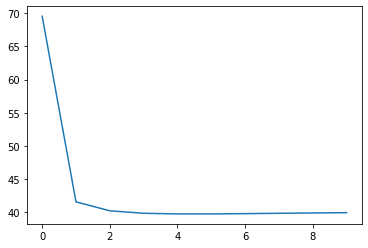

Step 0.0 ERROR: 69.5448286935106
Step 1.0 ERROR: 25.66959375695013
Step 2.0 ERROR: 20.06078691344399
Step 3.0 ERROR: 17.453061008265458
Step 4.0 ERROR: 15.831190801086894
Step 5.0 ERROR: 14.683461717960897
Step 6.0 ERROR: 13.81013439999616
Step 7.0 ERROR: 13.114087861114465
Step 8.0 ERROR: 12.541220882733342
Step 9.0 ERROR: 12.058466671680485
Class "2" error: 11.644209026051307


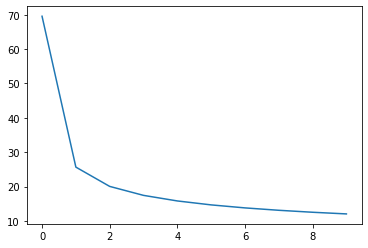

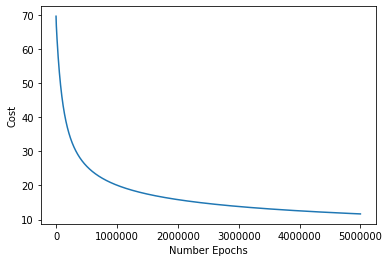

In [113]:
thetas, classes, costs = fit(x, y, alpha=0.0001, max_iter= 50 * 100 * 1000)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');


Посмотрим на линии, которые мы нашли в результате обучения модели и как они разделяют классы.
Если всё прошло правильно, то должно получиться нечно такое:
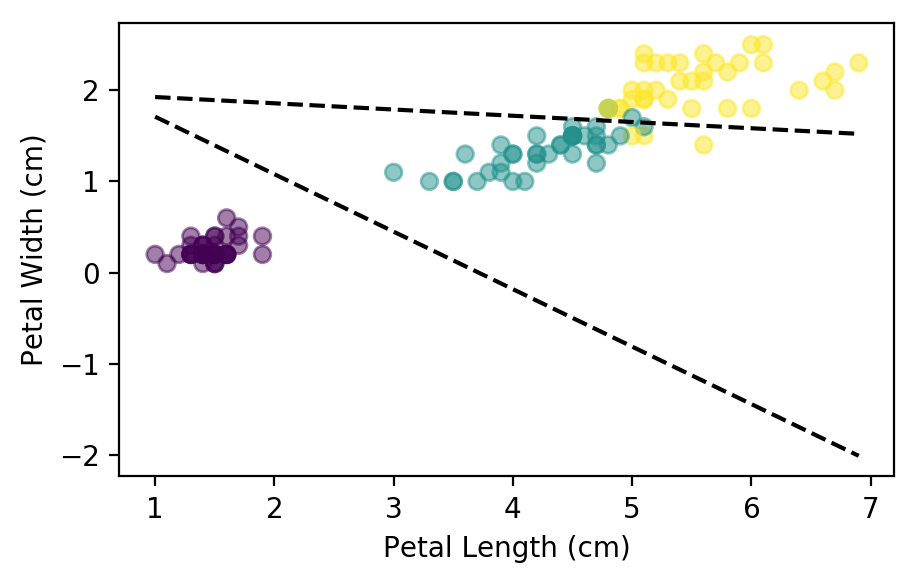

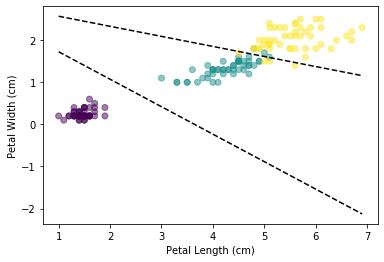

In [48]:
plt.scatter(x[:, 0], x[:, 1], c=y, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");

for theta in [thetas[0],thetas[2]]:
    j = np.array([x[:, 0].min(), x[:, 0].max()])

    # don't understand what happens here
    k = -(j * theta[1] + theta[0]) / theta[2]
#     ipdb.set_trace()
    plt.plot(j, k, color='k', linestyle="--")


In [103]:
thetas

[array([10.82566284, -2.97235638, -4.55027282]),
 array([-2.86365516,  1.56302835, -3.1530544 ]),
 array([-18.17924474,   1.54805301,   6.47235149])]

**6. Посчитайте точность классификации - accuracy.** 
    - Имплементируйте самостоятельно функцию accuracy - 1 балл  
    - Воспользуйтесь функцией sklearn.metrics.accuracy_score  - 1 балл

In [65]:
def manual_accuracy(x, thetas, y):
    
    # YOUR CODE HERE
    for t in thetas:
        y_pred = sigmoid(x @ t.T).round()
    
    tp = np.where(y_pred == y)


    return y_test
manual_accuracy(x, thetas, y)

> <ipython-input-65-f27e7f3792c9>(8)manual_accuracy()
      7 
----> 8     return y_test
      9 manual_accuracy(x, thetas, y)

ipdb> tp
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,
        55,  58,  62,  63,  67,  72,  73,  76,  83,  90, 100, 101, 102,
       104, 109, 110, 111, 112, 113, 114, 115, 120, 121, 123, 124, 126,
       127, 128, 132, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149]),)
ipdb> tp = np.where(y_pred == y, 1, 0)
ipdb> tp
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 

BdbQuit: 

In [50]:
from sklearn.metrics import accuracy_score

def sklearn_accuracy(x, thetas, y):
    # YOUR CODE HERE
    y_pred = predict(thetas, x)
    is_equal = lambda y: int(bool(y[0] - y[1]))
    y_pred_vs_y = np.c_[y_pred, y, np.zeros_like(y)]
    y_test = np.array([ is_equal(y) for y in y_pred_vs_y])

    
    score = accuracy_score(y, y_test)
    return score
                         
sklearn_accuracy(x, thetas, y)

0.5866666666666667

In [67]:
sklearn_accuracy(x, thetas, y)

0.5866666666666667

**7. Выведите [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) классификации c помощью фукнции metrics.confusion_matrix (1 балл)**

In [70]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix

confusion_matrix(y, predict(thetas, x))

array([[50,  0,  0],
       [36, 12,  2],
       [ 1, 16, 33]])

InteractivelyDefined: 97

**7*. Какие классы больше всего модель путает между собой? Дать ответ в виде названия классов, а не [0,1,2] (2 балла)**

YOUR ANSWER HERE


__Actual__: *Iris-Setosa*, __Pred__: *Iris-Versicolour* (36 times)

__Actual__: *Iris-Versicolour*, __Pred__: *Iris-Virginica* (16 times)

**8. Посчитайте precision, recall, F-1 score для классификации классов 0 и 1.**
То есть задача сводится к подсчёту результата бинарной классификации.

    - Имплементируйте три метрики самостоятельно - 3 балла (по 1 баллу за каждую метрику) 
    - Воспользуйтесь функцией sklearn.metrics.precision_recall_fscore_support  - 3 балла (по 1 баллу за каждую метрику) 

In [69]:
from sklearn.metrics import precision_recall_fscore_support

In [112]:
def precision(thetas, y):
    y_pred = predict(thetas, y)

#     

    return tp / (tp + fp)

precision(thetas, y)

AxisError: axis 1 is out of bounds for array of dimension 1

In [108]:
y_pred = predict(thetas, x)

In [111]:
precision_recall_fscore_support(y, y_pred)

(array([0.57471264, 0.42857143, 0.94285714]),
 array([1.  , 0.24, 0.66]),
 array([0.72992701, 0.30769231, 0.77647059]),
 array([50, 50, 50]))

**Вы молодец!  
Ноутбук - на гитхаб. Ссылку в LMS.**